회귀 계수:  [[2.9902591]]
절편:  [4.20634019]
평균 제곱 오차(MSE):  0.9177532469714293
결정계수(R2):  0.6521157503858555


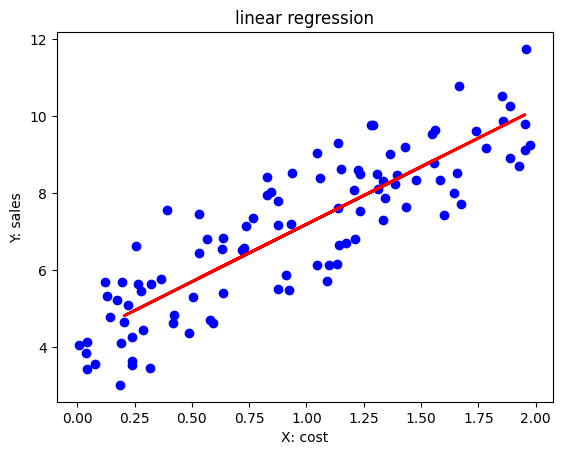

In [1]:
# 단순 선형 회귀

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 예시 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 단순선형회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 회귀 계수 및 절편 출력
print('회귀 계수: ', model.coef_)
print('절편: ', model.intercept_)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('평균 제곱 오차(MSE): ', mse)
print('결정계수(R2): ', r2)

# 시각화
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('linear regression')
plt.xlabel('X: cost')
plt.ylabel('Y: sales')
plt.show()

In [2]:
# 다중 선형 회귀

# 예시 데이터 생성
data = {'TV': np.random.rand(100) * 100,
        'Radio': np.random.rand(100) * 50,
        'Newspaper': np.random.rand(100) * 30,
        'Sales': np.random.rand(100) * 100}
df = pd.DataFrame(data)

# 독립 변수(X)와 종속 변수(Y) 설정
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 다중선형회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 회귀 계수 및 절편 출력
print('회귀 계수: ', model.coef_)
print('절편: ', model.intercept_)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('평균 제곱 오차(MSE): ', mse)
print('결정 계수(R2): ', r2)

회귀 계수:  [-0.02208636 -0.04524956  0.36955755]
절편:  47.47458066489462
평균 제곱 오차(MSE):  953.8458662397385
결정 계수(R2):  -0.1404412078044821


In [3]:
# 범주형 변수

# 예시 데이터 생성
data = {'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
        'Experience': [5, 7, 10, 3, 8],
        'Salary': [50, 60, 65, 40, 55]}
df = pd.DataFrame(data)

# 범주형 변수 더미 변수로 변환
# drop_first: 범주형 변수 중 1개를 빼는 것
# 어차피 마지막 1개 변수는 있으나 마나한 존재이기 때문에
df = pd.get_dummies(df, drop_first=True)

# 독립 변수(X)와 종속 변수(Y) 설정
X = df[['Experience', 'Gender_Male']]
y = df['Salary']

# 단순선형회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 회귀 계수 및 절편 출력
print('회귀 계수: ', model.coef_)
print('절편: ', model.intercept_)

# 모델 평가
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print('평균 제곱 오차(MSE): ', mse)
print('결정 계수(R2): ', r2)

회귀 계수:  [ 2.57281553 -6.01941748]
절편:  40.63106796116506
평균 제곱 오차(MSE):  3.1067961165048588
결정 계수(R2):  0.9580162686958803


평균 제곱 오차(MSE):  9.447441952450275
결정 계수(R2):  0.9898873384220381


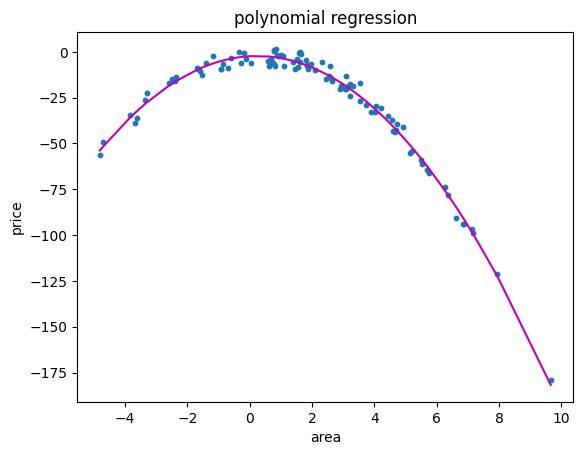

In [4]:
# 다항 회귀

from sklearn.preprocessing import PolynomialFeatures

# 예시 데이터 생성
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)
X = X[:, np.newaxis]

# 다항 회귀 (2차)
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)

# 모델 평가
mse = mean_squared_error(y, y_poly_pred)
r2 = r2_score(y, y_poly_pred)
print('평균 제곱 오차(MSE): ', mse)
print('결정 계수(R2): ', r2)

# 시각화
plt.scatter(X, y, s=10)
# 정렬된 X 값에 따른 y값 예측
sorted_zip = sorted(zip(X, y_poly_pred))
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='m')
plt.title('polynomial regression')
plt.xlabel('area')
plt.ylabel('price')
plt.show()